<a href="https://colab.research.google.com/github/ZhiyanAbdallah/PRODIGY_ML_02/blob/main/mallcostumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf
from google.colab import files
uploaded=files.upload()
df=pd.read_csv(next(iter(uploaded)))
df.head()

Saving Mall_Customers[1].csv to Mall_Customers[1].csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df["A"]=df[['Annual Income (k$)']]
df["B"]=df[['Spending Score (1-100)']]

In [ ]:
combined_data=df[["A","B"]]
combined_data.head()


,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


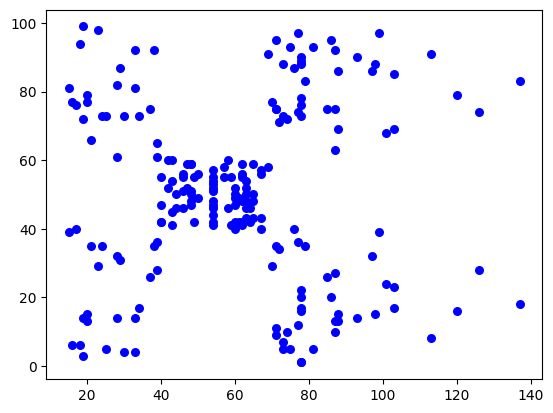

In [ ]:
plt.scatter(combined_data['A'],combined_data['B'],s=30,c='b')
plt.show()

In [ ]:
Kmean=KMeans(n_clusters=5)
Kmean.fit(combined_data)

centers=Kmean.cluster_centers_
centers
clusters=Kmean.fit_predict(combined_data)
df['label']=clusters
df.head(100)



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,2
1,2,Male,21,15,81,15,81,3
2,3,Female,20,16,6,16,6,2
3,4,Female,23,16,77,16,77,3
4,5,Female,31,17,40,17,40,2
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,1
96,97,Female,47,60,47,60,47,1
97,98,Female,27,60,50,60,50,1
98,99,Male,48,61,42,61,42,1


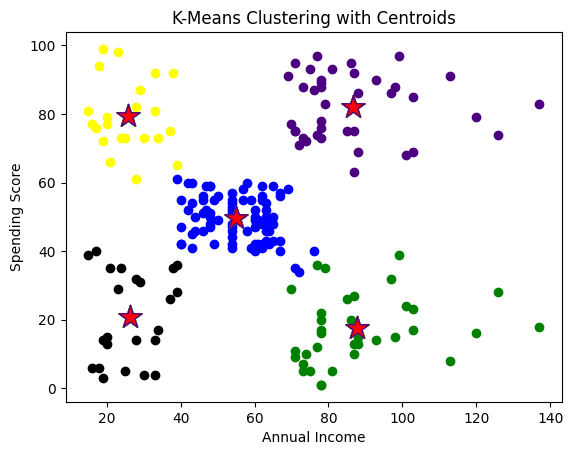

In [ ]:
import matplotlib.pyplot as plt

cols = ['green', 'blue', 'black', 'yellow','indigo']


for i in range(5):
    a = cols[i]


    plt.scatter(df.A[df.label == i], df.B[df.label == i], c=a, label=f'Cluster {i}')

    plt.scatter(centers[:, 0], centers[:,1], marker='*', s=300, c='red', edgecolor=a, label='Centroid 1')



plt.title('K-Means Clustering with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()




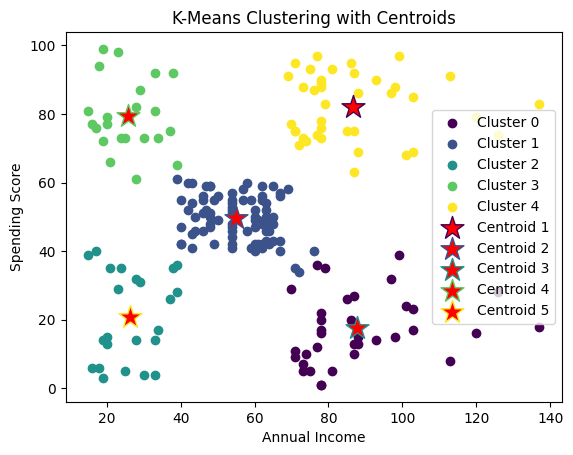

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the number of clusters (k) and use a colormap
k = 5
colors = cm.viridis(np.linspace(0, 1, k))  # Change 'viridis' to any colormap you prefer

# Plot each cluster with colors from the colormap
for i in range(k):
    plt.scatter(df.A[df.label == i], df.B[df.label == i], c=[colors[i]], label=f'Cluster {i}')

# Plot centroids in a specific color (e.g., red) with edge color matching each cluster color
for i in range(k):
    plt.scatter(centers[i, 0], centers[i, 1], marker='*', s=300, c='red', edgecolor=colors[i], label=f'Centroid {i+1}')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
